In [1]:
#!pip install tensorflow==2.17.0

In [2]:
#!pip install opencv-python mediapipe scikit-learn matplotlib

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils 

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results    

In [6]:
def draw_landmark(image, results): 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


In [8]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        image, results = mediapipe_detection(frame, holistic)
        #print(results)

        draw_styled_landmarks(image, results)
        
        cv2.imshow('OpenCV Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


C:\Users\sophi\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [9]:
#len(results.left_hand_landmarks.landmark)

mp_holistic.POSE_CONNECTIONS

In [10]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [11]:
draw_landmark(frame, results)

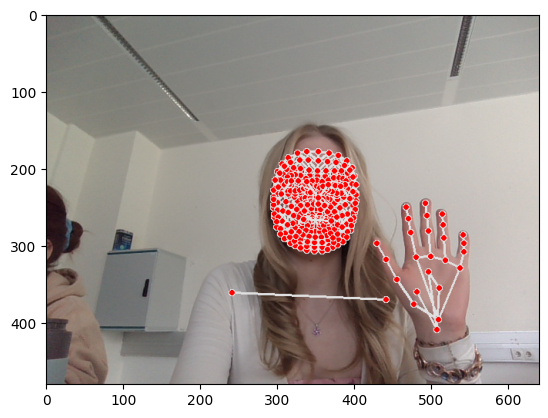

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
len(results.left_hand_landmarks.landmark)

21

In [14]:
for res in results.pose_landmarks.landmark: 
   test = np.array([res.x, res.y, res.z, res.visibility])

In [15]:
test

array([ 4.49733645e-01,  2.44339395e+00, -4.80969995e-01,  6.54577088e-05])

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose

[array([ 0.55188316,  0.49636796, -0.75217384,  0.99998921]),
 array([ 0.57263845,  0.46110898, -0.69131625,  0.99998218]),
 array([ 0.58603728,  0.46316233, -0.69133973,  0.99998403]),
 array([ 0.59820157,  0.4655371 , -0.69070441,  0.99997878]),
 array([ 0.52816516,  0.45243093, -0.69512856,  0.9999817 ]),
 array([ 0.51100725,  0.45068577, -0.69480568,  0.99998361]),
 array([ 0.49701643,  0.45001125, -0.69504774,  0.9999795 ]),
 array([ 0.61570752,  0.49949884, -0.31851846,  0.99997896]),
 array([ 0.47710973,  0.4861578 , -0.37077352,  0.99998719]),
 array([ 0.57907683,  0.55896544, -0.62592459,  0.99998635]),
 array([ 0.52245492,  0.55497193, -0.63695753,  0.99998838]),
 array([ 0.68998796,  0.77217752, -0.09287266,  0.99941397]),
 array([ 0.37699142,  0.75382996, -0.20540345,  0.99751669]),
 array([ 0.81011361,  1.12909937, -0.60946989,  0.82157242]),
 array([ 0.29706731,  1.05958164, -0.45375767,  0.33648336]),
 array([ 0.79313421,  0.85230076, -1.39973164,  0.9772079 ]),
 array([

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [19]:
res.y

2.4433939456939697

In [20]:
lh

array([ 7.95639455e-01,  8.26275885e-01,  2.86593121e-07,  7.45837986e-01,
        7.83447862e-01, -1.98538005e-02,  7.12196410e-01,  7.17627347e-01,
       -2.20209379e-02,  6.89365923e-01,  6.63270831e-01, -2.24746093e-02,
        6.71530306e-01,  6.20461941e-01, -2.05541961e-02,  7.50518084e-01,
        6.57078087e-01,  8.67015682e-03,  7.40371048e-01,  5.90349734e-01,
        4.53514187e-03,  7.34598637e-01,  5.53985834e-01, -2.32770015e-03,
        7.30389059e-01,  5.21364450e-01, -7.66257010e-03,  7.80791461e-01,
        6.54315591e-01,  1.31797045e-02,  7.75319576e-01,  5.85484087e-01,
        1.53366625e-02,  7.72691429e-01,  5.44208467e-01,  1.22349830e-02,
        7.70084858e-01,  5.12331486e-01,  9.31730773e-03,  8.09804857e-01,
        6.65377080e-01,  1.30062895e-02,  8.07396650e-01,  6.05640531e-01,
        1.30608836e-02,  8.05740237e-01,  5.69935799e-01,  1.22399181e-02,
        8.03151488e-01,  5.40072739e-01,  1.11671872e-02,  8.40344965e-01,
        6.85726881e-01,  

In [21]:
pose

array([ 5.51883161e-01,  4.96367961e-01, -7.52173841e-01,  9.99989212e-01,
        5.72638452e-01,  4.61108983e-01, -6.91316247e-01,  9.99982178e-01,
        5.86037278e-01,  4.63162333e-01, -6.91339731e-01,  9.99984026e-01,
        5.98201573e-01,  4.65537101e-01, -6.90704405e-01,  9.99978781e-01,
        5.28165162e-01,  4.52430934e-01, -6.95128560e-01,  9.99981701e-01,
        5.11007249e-01,  4.50685769e-01, -6.94805682e-01,  9.99983609e-01,
        4.97016430e-01,  4.50011253e-01, -6.95047736e-01,  9.99979496e-01,
        6.15707517e-01,  4.99498844e-01, -3.18518460e-01,  9.99978960e-01,
        4.77109730e-01,  4.86157805e-01, -3.70773524e-01,  9.99987185e-01,
        5.79076827e-01,  5.58965445e-01, -6.25924587e-01,  9.99986351e-01,
        5.22454917e-01,  5.54971933e-01, -6.36957526e-01,  9.99988377e-01,
        6.89987957e-01,  7.72177517e-01, -9.28726569e-02,  9.99413967e-01,
        3.76991421e-01,  7.53829956e-01, -2.05403447e-01,  9.97516692e-01,
        8.10113609e-01,  

In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [23]:
extract_keypoints(results)

array([ 0.55188316,  0.49636796, -0.75217384, ...,  0.        ,
        0.        ,  0.        ])

In [24]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['A', 'B', 'C', 'D', 'E', 'F'])
no_sequences = 60
#'A', 'B', 'C', 'D', 'E', 'F' , 'G', 'H', 'I' ,'J', 'K', 'L', ,'M', 'N', 'O'  'P', 'Q', 'R', 'S', 'T', 'U','V', 'W', 'X'   
sequence_length = 30

In [25]:
#keypoints

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [27]:
label_map = {label:num for num, label in enumerate(actions)}

In [28]:
label_map

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}

    cap.release()
    cv2.destroyAllWindows()

In [29]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [30]:
np.array(sequences).shape

(360, 30, 1662)

In [31]:
np.array(labels).shape

(360,)

In [32]:
X = np.array(sequences)

In [33]:
X.shape

(360, 30, 1662)

In [34]:
y = to_categorical(labels).astype(int)

In [35]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_train.shape

(342, 6)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Bidirectional

In [39]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [40]:
model1 = Sequential()
model1.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model1.add(LSTM(128, return_sequences=True, activation='relu'))
model1.add(LSTM(64, return_sequences=False, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\sophi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(Dropout(0.2))  # Add dropout after LSTM layers
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
from tensorflow.keras.layers import Bidirectional

model2 = Sequential()
# Use Bidirectional LSTM in the first or second LSTM layer
model2.add(Bidirectional(LSTM(64, return_sequences=True, activation='tanh'), input_shape=(30, 1662)))
model2.add(Dropout(0.2))  # Dropout for regularization
model2.add(Bidirectional(LSTM(128, return_sequences=True, activation='tanh')))  # You can add another Bidirectional layer
model2.add(Dropout(0.2))
model2.add(LSTM(64, return_sequences=False, activation='tanh'))  # Final LSTM without bidirectional
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(actions.shape[0], activation='softmax'))

optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)  # Adjust learning rate if needed
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\sophi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)  # Try a smaller learning rate if the model struggles
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
model2.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 398ms/step - accuracy: 0.1649 - loss: 1.7899
Epoch 2/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 391ms/step - accuracy: 0.1837 - loss: 1.7849
Epoch 3/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 399ms/step - accuracy: 0.2420 - loss: 1.7599
Epoch 4/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 384ms/step - accuracy: 0.2500 - loss: 1.7402
Epoch 5/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 374ms/step - accuracy: 0.2390 - loss: 1.7110
Epoch 6/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 359ms/step - accuracy: 0.2781 - loss: 1.6802
Epoch 7/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 374ms/step - accuracy: 0.2740 - loss: 1.6764
Epoch 8/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 369ms/step - accuracy: 0.2873 - loss: 1.6625
Epoch 9/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - accuracy: 0.3107 - loss: 1.6032
Epoch 10/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - accuracy: 0.2976 - loss: 1.6326
Epoch 11/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 0.3643 - loss: 1.5300
Epoch 12/2000
11/11 ━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [46]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 30, 128)             │         884,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 30, 256)             │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,708,020 (14.14 MB)

 Trainable params: 1,236,006 (4.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,472,014 (9.43 MB)

In [47]:
res = model2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [48]:
actions[np.argmax(res[2])]

'C'

In [ ]:
#actions[np.argmax(y_test[2])]model.save('action.h5')

In [49]:
model2.save('actionABCDEFNEW.h5')

In [50]:
model2.save('actionADCDEFNEW.keras')

In [ ]:
#del model

In [ ]:
model.load_weights('actionABCDEF.h5')

In [51]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [52]:
yhat = model2.predict(X_train)

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step


In [53]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
ytrue

In [ ]:
yhat

In [54]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[287,   0],
        [  8,  47]],

       [[282,   6],
        [  0,  54]],

       [[252,  33],
        [  4,  53]],

       [[276,   6],
        [ 17,  43]],

       [[282,   3],
        [ 31,  26]],

       [[270,  13],
        [  1,  58]]], dtype=int64)

In [55]:
accuracy_score(ytrue, yhat)

0.8216374269005848

In [56]:
threshold = 0.6

In [57]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)] * 2  # Repeat colors to match 6 actions
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:


plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))



In [ ]:
actions

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import time

sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)  # Open camera

# Set MediaPipe model
with mp_holistic.Holistic(min_detection_confidence=0.3, min_tracking_confidence=0.3) as holistic:
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture image from camera.")
            break

        frame_count += 1

        # Only process every 5th frame to reduce workload
        if frame_count % 5 != 0:
            continue

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        if results is None:
            print("No detections")
            continue
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Keypoints extraction
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep only last 30 frames

        # Prediction logic
        if len(sequence) == 30:
            start_time = time.time()
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(f"Prediction time: {time.time() - start_time}")
            print(actions[np.argmax(res)])

            # Visualization logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

        # Show result on screen
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
np.expand_dims(X_test[0], axis=0)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))